<a href="https://colab.research.google.com/github/Wal1d/Sudoku-Solver/blob/main/models/Digit%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
import keras

from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,Dropout,Flatten,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# ### loading mist hand written dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# threshold for removing noise 
_,X_train_th = cv2.threshold(X_train,127,255,cv2.THRESH_BINARY)
_,X_test_th = cv2.threshold(X_test,127,255,cv2.THRESH_BINARY)

In [4]:
X_train = X_train_th.reshape(-1,28,28,1)
X_test = X_test_th.reshape(-1,28,28,1)


y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [5]:
InputShape = (28,28,1)


model = Sequential()
model.add(Conv2D(input_shape=(InputShape), filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4080, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4080, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          3

In [6]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
BatchSize = 64
Epochs = 20
history = model.fit(X_train, y_train, batch_size=BatchSize, epochs=Epochs,validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/20
938/938 [==============================] - 47s 15ms/step - loss: 0.5398 - accuracy: 0.8146 - val_loss: 0.0777 - val_accuracy: 0.9792
Epoch 2/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0899 - accuracy: 0.9772 - val_loss: 0.0575 - val_accuracy: 0.9849
Epoch 3/20
938/938 [==============================] - 14s 14ms/step - loss: 0.0698 - accuracy: 0.9824 - val_loss: 0.0763 - val_accuracy: 0.9825
Epoch 4/20
938/938 [==============================] - 14s 15ms/step - loss: 0.0617 - accuracy: 0.9846 - val_loss: 0.0537 - val_accuracy: 0.9863
Epoch 5/20
938/938 [==============================] - 14s 15ms/step - loss: 0.0585 - accuracy: 0.9862 - val_loss: 0.0694 - val_accuracy: 0.9863
Epoch 6/20
938/938 [==============================] - 14s 15ms/step - loss: 0.0552 - accuracy: 0.9877 - val_loss: 0.0459 - val_accuracy: 0.9880
Epoch 7/20
938/938 [==============================] - 14s 14ms/step - loss: 0.0496 - accuracy: 0.9883 - val_loss: 0.0587 - val_accuracy:

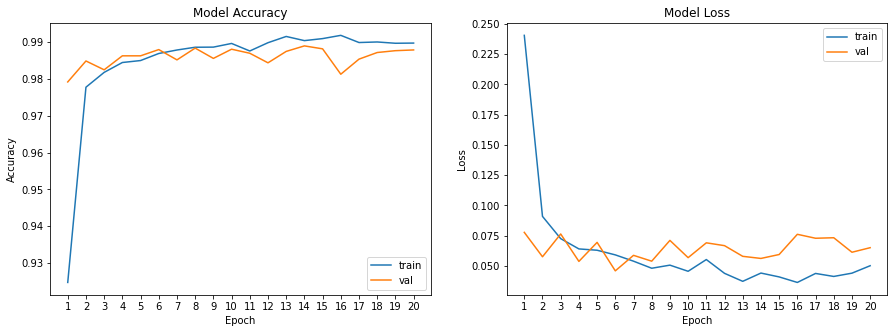

In [8]:
def plot_model_history(model_history):

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1))
    axs[0].legend(['train', 'val'], loc='best')
    
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1))
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

plot_model_history(history)

In [9]:
model.save('digit_classifier.h5')

In [11]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0650 - accuracy: 0.9879


In [12]:
print(results)


[0.06501168012619019, 0.9879000186920166]
